In [46]:
import numpy as np
import pandas as pd


In [47]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\email_spam\spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [48]:
df.shape
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

##DATA CLEANING

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
#drop last three columns
df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [51]:
df.sample(5)

,v1,v2
4466,ham,"She said,'' do u mind if I go into the bedroom..."
2156,ham,Hey cutie. How goes it? Here in WALES its kind...
3035,ham,;-) ok. I feel like john lennon.
2183,ham,"Chinatown got porridge, claypot rice, yam cake..."
2707,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...


In [52]:
#renaming the columns name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [53]:
df.sample(5)

,target,text
1437,ham,Wat so late still early mah. Or we juz go 4 di...
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."
3274,ham,Hurry home u big butt. Hang up on your last ca...
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY
717,ham,Book which lesson? then you msg me... I will c...


In [54]:
#encoding the target values where ham=0 and spam=1
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
df["target"]=lable_encoder.fit_transform(df["target"])

In [55]:
df.sample(5)

,target,text
2451,0,I know complain num only..bettr directly go to...
240,0,Tomarrow final hearing on my laptop case so i ...
4276,0,I'm glad. You are following your dreams.
4330,0,Nope i'll come online now..
2276,0,Love you aathi..love u lot..


In [56]:
#missing value
df.isnull().any()

target    False
text      False
dtype: bool

#remove duplicate values

In [57]:

#checking duplicate members in dataset
df.duplicated().sum()

403

In [58]:
#deleting duplicate values in dataset
df = df.drop_duplicates(keep="first")

In [59]:
df.duplicated().sum()

0

EDA

In [60]:
#calculating how many hams and spams are there
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

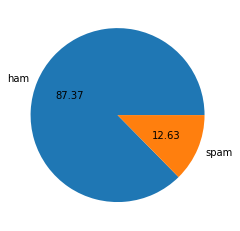

In [61]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [62]:
#data id imbalanced
!pip install nltk

In [63]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#len of char
df["num_char"]=df.text.apply(len)

In [65]:
df.sample(5)

,target,text,num_char
519,0,Usually the person is unconscious that's in ch...,117
2189,0,Yup i shd haf ard 10 pages if i add figures......,73
4405,1,As one of our registered subscribers u can ent...,132
1851,0,Dunno da next show aft 6 is 850. Toa payoh got...,51
4910,0,Love that holiday Monday feeling even if I hav...,80


In [66]:
#num of words 
df["num_word"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
#calculating sentences
df["num_sentences"] = df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df.columns

Index(['target', 'text', 'num_char', 'num_word', 'num_sentences'], dtype='object')

In [71]:
df[['num_char', 'num_word', 'num_sentences']].describe()

,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [72]:
#for ham massages
df[df["target"]==0][['num_char', 'num_word', 'num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [73]:
#for spam massages
df[df["target"]==1][['num_char', 'num_word', 'num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [74]:
import seaborn as sns

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

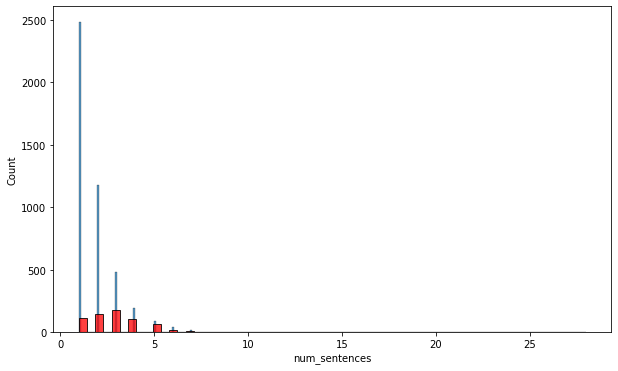

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]['num_sentences'])#ham
sns.histplot(df[df["target"]==1]['num_sentences'],color="red")#spam


<AxesSubplot:>

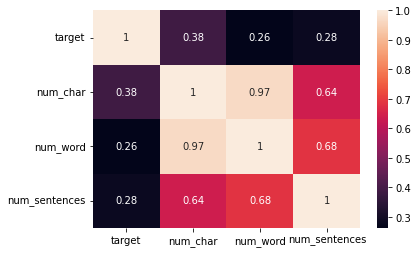

In [76]:
sns.heatmap(df.corr(),annot=True)

DATA PREPROCESSING

In [77]:
#LOW CASE
#TOKENIZATION
#REMOVING STOP WORD AND PUNCTUATION
#STEMMING

In [78]:
import nltk
from nltk.corpus import stopwords

In [79]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
from matplotlib.pyplot import stem


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)  

    text = y[:]
    y.clear()

    for i in text:
        y.append(porter.stem(i))

    return " ".join(y)

In [81]:
transform_text("did you like my running on ml?")

'like run ml'

In [82]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
porter.stem("loving")

'love'

In [83]:
df["text"][1]

'Ok lar... Joking wif u oni...'

In [91]:
x = df.text.apply(lambda x:transform_text(x))

In [97]:
df.tranformed_text  = x

In [98]:
df.head()

,target,text,num_char,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
#wordcloud 
!pip install wordcloud

In [87]:

from wordcloud import WordCloud
wc = WordCloud(width=200,height=200,background_color="white")

In [100]:
spam_wc=wc.generate(df[df["target"]==1]["transform_text"].str.cat(sep=" "))

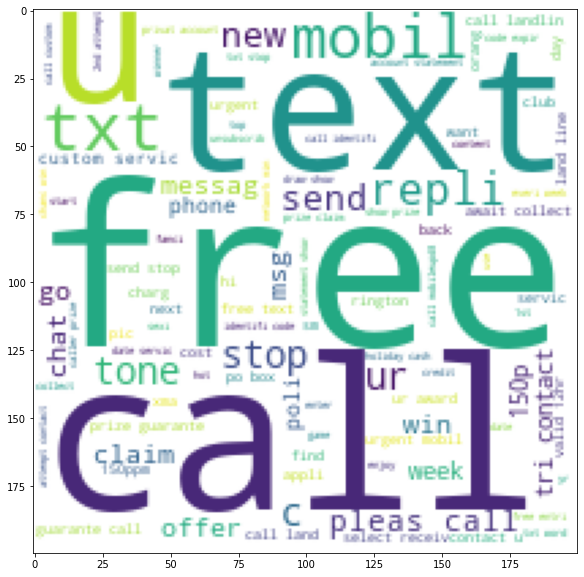

In [101]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

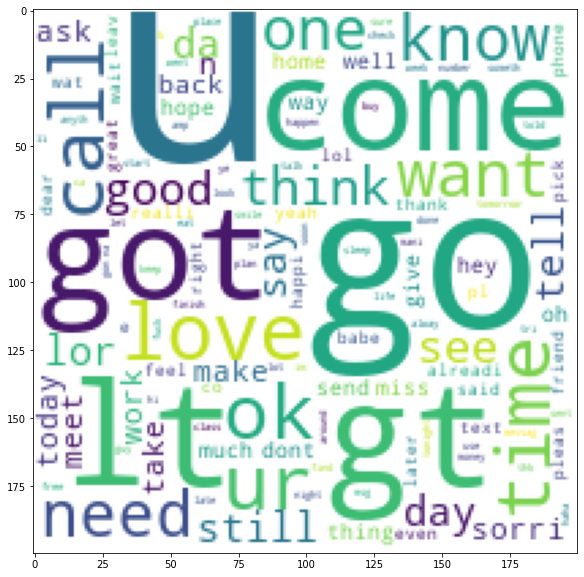

In [102]:
ham_wc=wc.generate(df[df["target"]==0]["transform_text"].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [103]:
df.head()

,target,text,num_char,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [104]:
word_corpus=[]
for i in df[df["target"]==1]["transform_text"].tolist():
    for word in i.split():
        word_corpus.append(word)


In [105]:
len(word_corpus)

9939

In [106]:
from collections import Counter
Counter(word_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [108]:
words_corpus=[]
for i in df[df["target"]==0]["transform_text"].tolist():
    for word in i.split():
        words_corpus.append(word)

Counter(words_corpus).most_common(30)


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

In [109]:
len(words_corpus)

35394

MODEL BUILDING


In [110]:
df.head()

,target,text,num_char,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [112]:
#performing vectorization
#bagging word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =CountVectorizer()
tf = TfidfVectorizer(max_features=3000)
X=tf.fit_transform(df["transform_text"]).toarray()
y = df["target"].values

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [115]:
gmb = GaussianNB()
multi = MultinomialNB()
ber = BernoulliNB()

In [116]:
gmb.fit(x_train,y_train)
y_preb = gmb.predict(x_test)

In [117]:
print(accuracy_score(y_test,y_preb))
print(precision_score(y_test,y_preb))
print(confusion_matrix(y_test,y_preb))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [118]:
multi.fit(x_train,y_train)
y_preb1 = multi.predict(x_test)
print(accuracy_score(y_test,y_preb1))
print(precision_score(y_test,y_preb1))
print(confusion_matrix(y_test,y_preb1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [119]:
ber.fit(x_train,y_train)
y_preb1 = ber.predict(x_test)
print(accuracy_score(y_test,y_preb1))
print(precision_score(y_test,y_preb1))
print(confusion_matrix(y_test,y_preb1))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [123]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [124]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_preb = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_preb)
    precision = precision_score(y_test,y_preb)

    return accuracy,precision


In [125]:
train_classifier(svc,x_train,x_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [126]:
accuracy_score_ = []
precision_score_ = []

for name,clf in clfs.items():
    accu,preci = train_classifier(clf,x_train,x_test,y_train,y_test)
    print("For ",name)
    print("accuracy_score",accu)
    print("precision_score",preci)

    accuracy_score_.append(accu)
    precision_score_.append(preci)
    

For  SVC
accuracy_score 0.9758220502901354
precision_score 0.9747899159663865
For  KN
accuracy_score 0.9052224371373307
precision_score 1.0
For  NB
accuracy_score 0.9709864603481625
precision_score 1.0
For  DT
accuracy_score 0.9294003868471954
precision_score 0.8282828282828283
For  LR
accuracy_score 0.9584139264990329
precision_score 0.9702970297029703
For  RF
accuracy_score 0.9748549323017408
precision_score 0.9827586206896551
For  AdaBoost
accuracy_score 0.960348162475822
precision_score 0.9292035398230089
For  BgC
accuracy_score 0.9574468085106383
precision_score 0.8671875
For  ETC
accuracy_score 0.9748549323017408
precision_score 0.9745762711864406
For  GBDT
accuracy_score 0.9477756286266924
precision_score 0.92
For  xgb
accuracy_score 0.971953578336557
precision_score 0.943089430894309


In [127]:
performances_df  = pd.DataFrame({"Algorithems":clfs.keys(),"Accurecy":accuracy_score_,"Precision":precision_score_}).sort_values("Precision",ascending=False)
performances_df

,Algorithems,Accurecy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [ ]:
import pickle
pickle.dump(tf,open("vectorizer.pkl","wb"))
pickle.dump(multi,open("model.pkl","wb"))